In [ ]:
# Pandas Melt function
# This is a way to transform a dataframe to convert columns to rows.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = {
    "City": ["New York", "Chicago", "Los Angeles"],
    "Phish": [15, 2, 4],
    "Billy Strings": [6, 3, 2],
    "Tool": [1, 1, 1]
}
df = pd.DataFrame(data)
df.head()

,City,Phish,Billy Strings,Tool
0,New York,15,6,1
1,Chicago,2,3,1
2,Los Angeles,4,2,1


In [3]:
# df – our dataframe from above

# id_vars – the column(s) that you want to save in the melted dataframe

# var_name – the new column name with the columns headers from the other original dataframe

# value_name – the new column name with the values from the other original dataframe

melted_df = pd.melt(
    df,
    id_vars = ['City'],
    var_name = 'Band',
    value_name='Unique Concerts'
)
melted_df

,City,Band,Unique Concerts
0,New York,Phish,15
1,Chicago,Phish,2
2,Los Angeles,Phish,4
3,New York,Billy Strings,6
4,Chicago,Billy Strings,3
5,Los Angeles,Billy Strings,2
6,New York,Tool,1
7,Chicago,Tool,1
8,Los Angeles,Tool,1


In [4]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [8]:
melted_penguins = pd.melt(
    penguins,
    id_vars=['species', 'island'],
    value_vars = ['bill_length_mm',	'bill_depth_mm',	'flipper_length_mm',	'body_mass_g'],
    var_name = "measurment_type",
    value_name = 'measurment_value'
)
melted_penguins

,species,island,measurment_type,measurment_value
0,Adelie,Torgersen,bill_length_mm,39.1
1,Adelie,Torgersen,bill_length_mm,39.5
2,Adelie,Torgersen,bill_length_mm,40.3
3,Adelie,Torgersen,bill_length_mm,NaN
4,Adelie,Torgersen,bill_length_mm,36.7
...,...,...,...,...
1371,Gentoo,Biscoe,body_mass_g,NaN
1372,Gentoo,Biscoe,body_mass_g,4850.0
1373,Gentoo,Biscoe,body_mass_g,5750.0
1374,Gentoo,Biscoe,body_mass_g,5200.0


In [9]:
melted_penguins.groupby(['species', 'measurment_type'])['measurment_value'].mean().reset_index()

,species,measurment_type,measurment_value
0,Adelie,bill_depth_mm,18.346358
1,Adelie,bill_length_mm,38.791391
2,Adelie,body_mass_g,3700.662252
3,Adelie,flipper_length_mm,189.953642
4,Chinstrap,bill_depth_mm,18.420588
5,Chinstrap,bill_length_mm,48.833824
6,Chinstrap,body_mass_g,3733.088235
7,Chinstrap,flipper_length_mm,195.823529
8,Gentoo,bill_depth_mm,14.982114
9,Gentoo,bill_length_mm,47.504878


In [10]:
penguins.groupby('species')[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].mean().reset_index()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,38.791391,18.346358,189.953642,3700.662252
1,Chinstrap,48.833824,18.420588,195.823529,3733.088235
2,Gentoo,47.504878,14.982114,217.186992,5076.016260


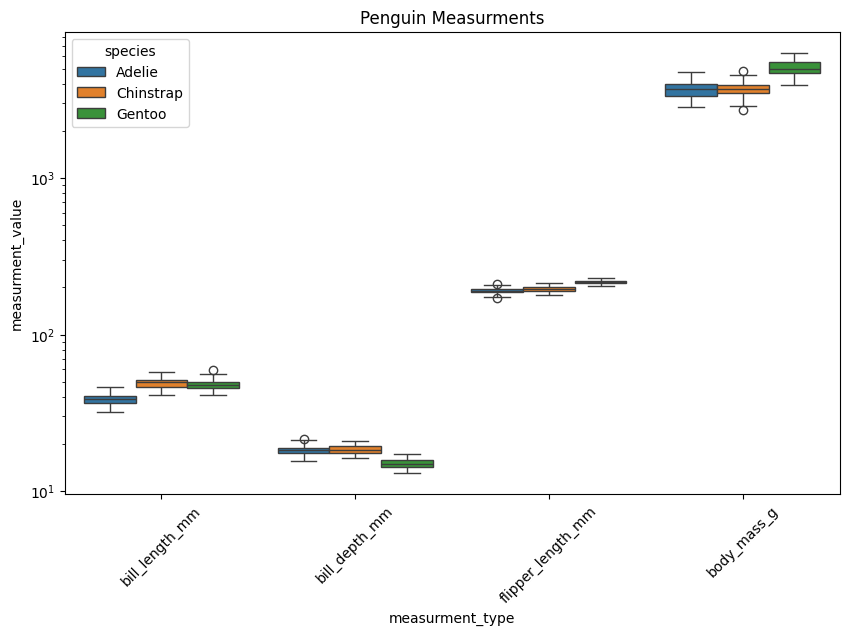

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(data=melted_penguins, x="measurment_type", y='measurment_value', hue='species')
plt.yscale("log")
plt.xticks(rotation=45)
plt.title("Penguin Measurments")
plt.show()

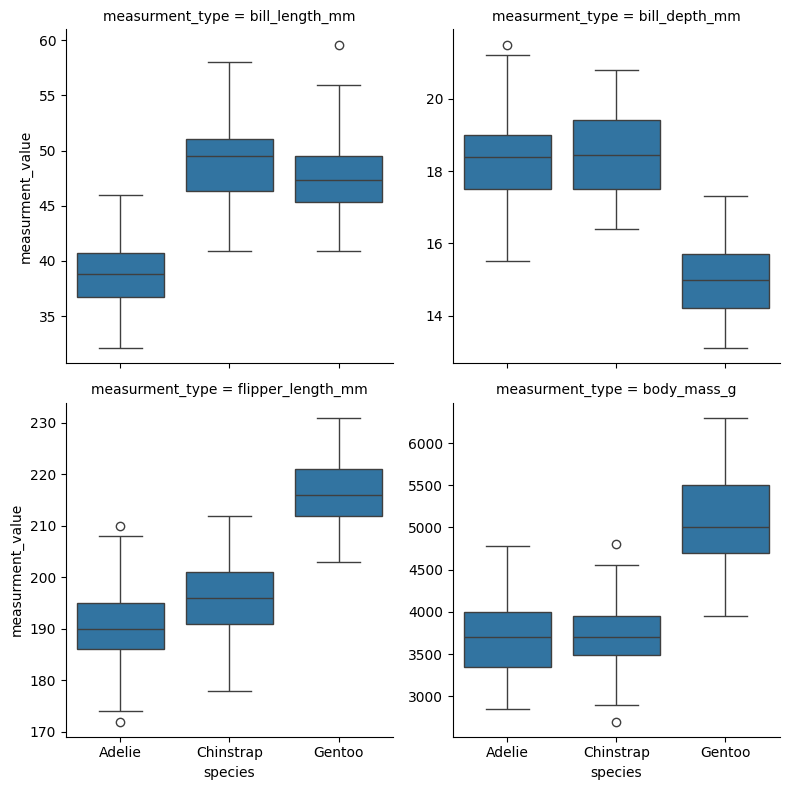

In [12]:
g = sns.FacetGrid(melted_penguins, col='measurment_type', col_wrap=2, height=4, sharey=False)
g.map_dataframe(sns.boxplot, x='species', y='measurment_value')
plt.show()

<Figure size 1000x600 with 0 Axes>

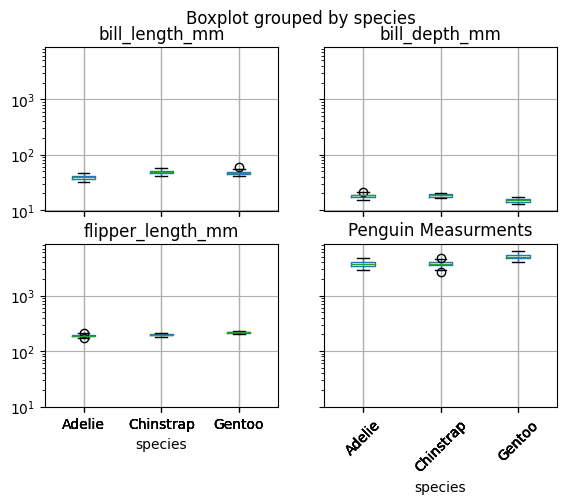

In [13]:
plt.figure(figsize=(10,6))
penguins.boxplot(column=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], by='species')
plt.yscale("log")
plt.xticks(rotation=45)
plt.title("Penguin Measurments")
plt.show()